# Please take a look at this tutorial to understand the transfer learning: **https://www.unite.ai/what-is-transfer-learning/?msclkid=ddd87f78a55811ec916f1862ecb20adf**

In [8]:
!pip install fastai==2.4.1

     |████████████████████████████████| 188 kB 5.2 MB/s 
     |████████████████████████████████| 831.4 MB 6.3 kB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 21.0 MB 60.5 MB/s 
     |████████████████████████████████| 23.2 MB 47.6 MB/s 
     |████████████████████████████████| 23.3 MB 1.6 MB/s 
     |████████████████████████████████| 23.3 MB 1.4 MB/s 
     |████████████████████████████████| 22.1 MB 1.4 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
ERROR: pip's depend

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import os
import torch
from PIL import Image
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
#import cv2
import torch.nn as nn
import torch.nn.functional as F
#import albumentations as A
import torch.optim as optim 
# from torch_lr_finder import *
# from torch_lr_finder import LRFinder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import asarray
from fastai import *
from fastai.vision import *
from fastai.vision.data import ImageDataLoaders
from sklearn.model_selection import StratifiedKFold
import glob

In [2]:
from fastai.vision.all import *

from fastai.metrics import accuracy
from fastai.torch_core import *
# from fastai_audio import *

from fastai.vision import models
np.random.seed(42)


**The data file should contain folders each one contain the images for a specific class**

In [8]:
# define the data 
data_path='/content/drive/MyDrive/Data/output0'
data = ImageDataLoaders.from_folder(data_path, train=.8, valid_pct=0.2, 
    item_tfms=RandomResizedCrop(128, min_scale=0.35),shuffle=True, batch_tfms=Normalize.from_stats(*imagenet_stats))

In [ ]:
data.show_batch()

In [5]:
roc=RocAuc()
learn = cnn_learner(data, models.resnet50, metrics=[accuracy,roc],
                loss_func=LabelSmoothingCrossEntropy(),
                   )

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0030199517495930195)

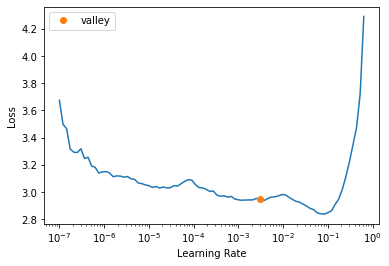

In [ ]:
learn.lr_find()

In [ ]:
lr = 1e-02
learn.fit_one_cycle(20, 3e-3)
# learn.save('/mnt/workspace/segni/saved_models/resnet50_6emo/stage-1-rn50')

epoch,train_loss,valid_loss,accuracy,time
0,0.871175,0.902082,0.646718,00:17
1,0.901196,0.921329,0.637066,00:17
2,0.955686,1.053062,0.597169,00:17
3,0.966581,1.000631,0.595882,00:17
4,0.990931,1.004018,0.626126,00:17
5,0.950136,1.038630,0.619048,00:17
6,0.928698,1.029022,0.610039,00:17
7,0.893648,0.933268,0.627413,00:17
8,0.891079,0.938138,0.644144,00:17
9,0.872319,0.928188,0.640283,00:17


In [ ]:
# learn.fit_one_cycle(10, slice(5e-7, lr/5))

In [ ]:
learn.save('stage-1-rn18_epoch')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=2)

[('sadness', 'neutral', 88),
 ('neutral', 'sadness', 75),
 ('happiness', 'sadness', 53),
 ('happiness', 'anger', 51),
 ('anger', 'happiness', 49),
 ('neutral', 'happiness', 49),
 ('happiness', 'neutral', 48),
 ('anger', 'neutral', 45),
 ('sadness', 'happiness', 34),
 ('neutral', 'anger', 23),
 ('anger', 'sadness', 14),
 ('sadness', 'anger', 3)]

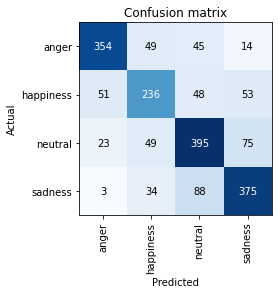

In [ ]:
interp.plot_confusion_matrix()